<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  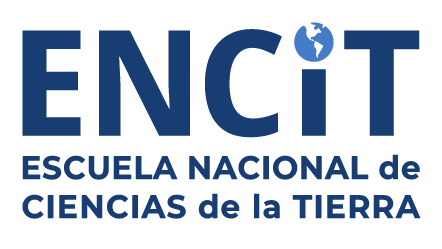
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 4: Introducción al Aprendizaje Automático (Machine Learning) </span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> Preprocesamiento de datos: Análisis univariado y bivariado  </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen">  Análisis exploratorio de datos </font>**

El análisis exploratorio de datos (AED), o EDA por sus siglas en inglés, es una fase inicial en el análisis de datos que utiliza visualizaciones y estadísticas para investigar y comprender las características principales de un conjunto de datos, buscando patrones, valores atípicos y relaciones entre variables. Su objetivo es explorar la estructura de los datos, la calidad y la presencia de anomalías, no confirmar una hipótesis estadística preexistente. Es un proceso creativo y de descubrimiento que sirve como paso previo esencial antes de realizar un análisis estadístico o creación de modelos más complejos. 

## **<font color="SeaGreen"> Pronostico estacional de sequia </font>**

A lo largo de esta unidad estaremos construyendo modelos de machine learning para hacer un pronóstico estacional de sequía para un punto en el noroeste de México (lat = 29.725, lon = -109.725).


### Paso 0:   Plantear el problema

* ¿Cuál es el fenómeno físico que quiero estudiar?
    **El comportamiento de la sequía** 
* ¿Cuál es la variable dependiente?
   El SPI (Standardized Precipitation Index) —o Índice Estandarizado de Precipitación— es un indicador estadístico usado para medir las anomalías de precipitación (lluvia) en una región y período determinados. Su objetivo principal es cuantificar las condiciones de sequía o exceso de lluvia de manera estandarizada y comparable en el tiempo y el espacio.

    **La variable dependiente sera el SPI de 3 meses (que corresponde a una sequia meteorologica)**

* ¿Es una regresión o una clasificación? 



### Paso 1:  Datos 

* Obtener información diversa (¿Necesitamos muchos datos?).

    ¿Existen datos confiables que pueda usar?
    ¿Los datos tienen variedad?

* Remover información falsa, buscar/llenar valores faltantes… 

    Si no lleno los vacíos, el molodelo los aprenderá también.

* Proponer variables “predictoras” 

* Hacer un análisis estadístico de las variables propuestas.

* Definir las variables de entrada.


> Las variables que estan relacionadas con las sequías son aquellas que afectan al ciclo hidrológico y que pueden causar un estrés hídrico. Una alteración en estas variables detonan reacciones en cadena conocidas como procesos de retroalimentación.

Las variables que se proponen (inicialmente) para hacer los modelos, y sus procedencias, son las siguientes:


|Variable                                     | Abreviacion  | Base de datos  |
|---------------------------------------------|--------------|----------------|
|Precipitación acumulada                      | pcp          | CHIRPS         |
|Radiación de onda larga saliente             | OLR          | NCEP-NCAR      |
|SSTs en la región de El Niño 3.4             | SST          | NOAA           |
|Volumen de agua en la primera capa del suelo | swvl1        | ERA-5 Land     |
|Temperatura en la superficie del suelo       | skt          | ERA-5 Land     |
|Altura geopotencial en 600mb                  | hgt          | NCEP-NCAR      |





<div class="alert alert-block alert-info">
<b>Nota:</b> Por cuestiones de cómputo sólo obtendremos el pronostico del SPI de Marzo-Abril-Mayo (El trimestre más seco en México).  Vamos a crear el pronostico sin anticipación (usando predictores de DEF), con un mes de anticipación (usando predictores de NDE) y con 2 meses de anticipación (usando predictores de OND). 
</div>


<div class="alert alert-success">
    <b>Paso 1 : <b> La misión en esta clase es hacer el AED, vamos a hacer un análisis univariado (que ya saben hacer) y el análisis bivariado. Debemos corroborar que nuestros datos son buenos, es decir que no hay valores faltantes, presencia de valores atípicos extraños, etc...
</div>


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

### **<font color="SeaGreen"> Vamos a explorar la base de datos </font>**

* Crea un DataFrame con los datos de `sequias_datos.csv` y muestra las primeras filas.
* Muestra cuáles son las columnas que existen en el DataFrame.
* Imprime la información del DataFrame para saber si hay valores faltantes. 

In [ ]:
df = ___________________________________
df.__________________________

In [ ]:
# Antes de empezar, van a graficar la linea de tiempo del SPI (Usando un lineplot)




### **<font color="SeaGreen"> Análisis estadistico univarido </font>**

Primero, para hacer el pronóstico del SPI de Marzo-Abril-Mayo vamos a usar únicamente las variables de Diciembre-Enero-Febrero. Con esto crearemos un pronóstico sin anticipación. 

* Crea un nuevo DataFrame que sólo contenga las variables `'spi', 'sst_mean_DJF', 'pcp_DJF', 'hgt_DJF', 'olr_DJF', 'skt_DJF', 'swvl1_DJF'`
* Obten un resumen de las medidas de tendencia central, de posición, y dispersión de los datos.
* Obten los histogramas y los boxplots para cada variable.


### **<font color="blue"> Análisis bivariado </font>** 

El análisis bivariado en machine learning (aprendizaje automático) es fundamental para comprender la relación entre dos variables a la vez, lo cual es crucial para varios pasos del proceso de desarrollo del modelo.

Sus principales propósitos son:

* **Identificar relaciones y patrones:** Permite descubrir si existe una asociación, dependencia o correlación entre dos variables (por ejemplo, entre las horas de estudio y el rendimiento académico). Esto puede revelar tendencias y patrones que no son evidentes con el análisis univariado (de una sola variable).
* **Selección de características (Feature Selection):** Ayuda a determinar qué variables de entrada son más relevantes para predecir la variable objetivo. Si una variable de entrada no tiene una relación significativa con la variable objetivo, podría descartarse para simplificar el modelo y mejorar su eficiencia.
* **Ingeniería de características (Feature Engineering):** Al entender cómo se relacionan dos variables, se pueden crear nuevas características combinadas o transformadas que capturen mejor la información para el modelo. Esto puede resultar en modelos más flexibles y con mejor rendimiento.
* **Entender la dirección e intensidad de la relación:** Permite cuantificar la fuerza y el tipo de asociación. Por ejemplo, una correlación positiva indica que ambas variables aumentan juntas, mientras que una negativa muestra que una disminuye cuando la otra aumenta.
* **Informar el preprocesamiento de datos:** Los hallazgos del análisis bivariado pueden guiar decisiones sobre cómo manejar los datos, como la imputación de valores faltantes o la transformación de variables, asegurando que los datos sean adecuados para el análisis posterior.
* **Mejorar la interpretabilidad del modelo:** Comprender las relaciones subyacentes entre las características y la variable objetivo facilita la explicación de cómo el modelo llega a sus predicciones.

El análisis bivariado consiste en obtener correlaciones, y gráficos de dispersion (pairplots). 
Ahora, vamos a obtener estos dos recursos.

1. Obtener los mapas de calor con las correlaciones (Correlacion de pearson y correlacion de Spearman) de las variables.
2. Obtener los pairplots 

In [ ]:
# Para obtener las matrices de correlacion:
pearson_correlation_matrix = df_DEF.corr(method='pearson')
# Obtengan la metriz de correlacion de Speaman. 
spearman_correlation_matrix = ________________________________

In [ ]:
# Ahora vamos a creat el heatmap de la correlacion de pearson

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_correlation_matrix,
    annot=True,      # Muestra los valores de correlacion en el heatmap 
    cmap='coolwarm', # Escogemos una paleta de colores (e.g., 'coolwarm', 'viridis', 'RdBu')
    fmt=".2f",       # Formato para que solo aparezcan dos decimales. 
    linewidths=.5    
)
plt.title('Correlacion de Pearson')
plt.show()         

In [ ]:
# A ustedes les toca obtener el heatmap de la correlacion de Spearman 


___________________________________________


In [ ]:
# El pairplot es muy sencillo

plt.figure()
sns.pairplot(df_DEF)
plt.show()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 1 </font>**

<font color="DarkBlue"> 1. Ahora es su turno, van hacer el AED considerando ahora los predictores de NDE y OND.

---

---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 2 </font>**

<font color="DarkBlue"> 1. Sube los datos de calidad del aire de Querétaro (`'2025-01-JQRO_hora_L1_caire.csv'`, `'2025-02-JQRO_hora_L1_caire.csv'`, `'2025-03-JQRO_hora_L1_caire.csv'`) y concaténalos para tener sólo un DataFrame.
    
<font color="DarkBlue"> 2. Sube los datos meteorológicos (`'RUOA_jqro_2025_01.csv'`,`'RUOA_jqro_2025_02.csv'`, `'RUOA_jqro_2025_03.csv'`) y concaténalos. Cambia el nombre de `"TIMESTAMP"` por `"Time"`, y únelo con el Dataframe del punto anterior usando `.merge()`.
    
<font color="DarkBlue"> 3. Grafica la serie de tiempo de `'PM2.5'` y `'PM10'`.

<font color="DarkBlue"> 4. Agrega 2 columnas extra `'PM2.5_5horasdeps'` y `'PM10_5horasdeps'`, estas van a contener los datos desplazados de las columnas originales para relacionar los contaminantes con los datos meteorológicos de 5 horas antes (usa `.shift(-5)`).

<font color="DarkBlue"> 5. Crea un nuevo DataFrame que sólo tenga los datos cuyos valores de `'PM10_flag'` y `'PM2.5_flag'` sean `'OK'` (osea, sólo mediciones válidas). Luego elimina las variables `'O3','O3_flag','SO2', 'SO2_flag', 'NO2', 'NO2_flag', 'NO', 'NO_flag', 'CO', 'CO_flag','PM10_flag','PM2.5_flag'`.

<font color="DarkBlue"> 6. Elimina las filas con datos faltantes.

<font color="DarkBlue"> 7. Realiza el AED (resumen estadístico, histogramas, boxplots, mapas de calor (correlaciones de Pearson y Spearman) y pairplots).


---